# Inferência Variacional
---

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal, gamma, norm
import matplotlib.pyplot as plt

In [2]:
# X = np.loadtxt("gaussian_1d.csv", delimiter=',')
# true_mean = np.mean(X)
# true_var = np.var(X)
np.random.seed(123)
true_mean = 2
true_tau = 2
X = np.random.normal(true_mean,1/np.sqrt(true_tau), 10)

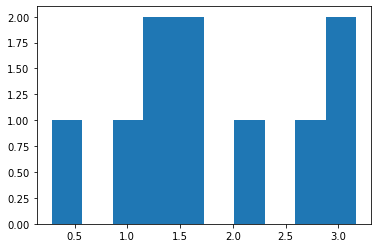

In [3]:
_ = plt.hist(X)

In [4]:
def fit(X, mean_0, k_0, a_0, b_0, itter=400):
    N = X.shape[0]
    
    mean = (k_0*mean_0 + np.sum(X)) / (k_0 + N)
    a = a_0 + (N+1)/2
    
    k = k_0
    b = b_0
    
    mean_diff = (mean - mean_0)**2
    X_diff = (X - mean)**2
    
    for i in range(itter):
        k = (k_0 + N) * a / b
        b = b_0 + (k_0/2)*((1/k) + mean_diff) + 0.5*np.sum((1/k) + X_diff)
    
    post_mean = lambda m: norm(mean, 1/k).pdf(m)
    
    gamma_tau = gamma(a,b)
    post_tau = lambda t: gamma_tau.pdf(t)
    
    return (mean, 1/k, post_mean), (a/b, post_tau)

a_0 = 2
b_0 = 1
priori_tau = lambda t: gamma(a_0,b_0).pdf(t)

#rever inicialização da priori gaussiana
mean_0 = 0
tau_0 = 1/(np.var(X)**2)
k_0 = 1
priori_mean = lambda m: norm(mean_0, 1/k_0).pdf(m)

(expected_mean, var_mean, post_mean), (expected_tau, post_tau) = fit(X, mean_0, k_0, a_0, b_0)

### Média

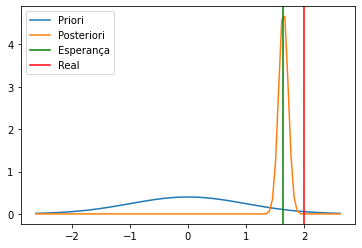

In [5]:
margin = 3*np.sqrt(X.var())
m = np.linspace(-margin, margin, 100) + mean_0
plt.plot(m, priori_mean(m), label="Priori")
plt.plot(m, post_mean(m), label="Posteriori")
plt.gca().axvline(x=expected_mean, color="g", label="Esperança")
plt.gca().axvline(x=true_mean, color="r", label="Real")
_ = plt.legend()

## $\tau$

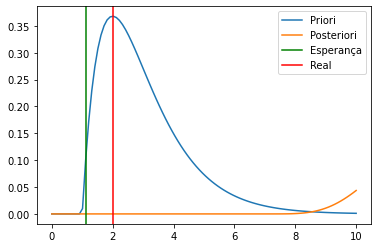

In [6]:
t = np.linspace(0, 10, 100)
plt.plot(t, priori_tau(t), label="Priori")
plt.plot(t, post_tau(t), label="Posteriori")
plt.gca().axvline(x=expected_tau, color="g", label="Esperança")
plt.gca().axvline(x=true_tau, color="r", label="Real")
_ = plt.legend()